<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/DRandFScomparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## libraries Session

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier ,VotingRegressor ,RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np 
from numpy import loadtxt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import Lasso, LogisticRegression,LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import standardize

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Datasets Session

In [ ]:
Dataset2Classification = pd.read_excel('/content/default of credit card clients.xls', header=1)

In [ ]:
Dataset2Classification.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
Dataset5Regression = pd.read_csv('/content/train.csv')

In [ ]:
Dataset5Regression.head(4)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355

# ***LinearDiscriminantAnalysis***

In [ ]:
X=Dataset2Classification.drop(['ID','default payment next month'],axis=1)
y=Dataset2Classification['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=15)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


# For Classification

# RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[4495  208]
 [ 850  447]]


Accuracy0.8236666666666667


              precision    recall  f1-score   support

           0       0.96      0.84      0.89      5345
           1       0.34      0.68      0.46       655

    accuracy                           0.82      6000
   macro avg       0.65      0.76      0.68      6000
weighted avg       0.89      0.82      0.85      6000





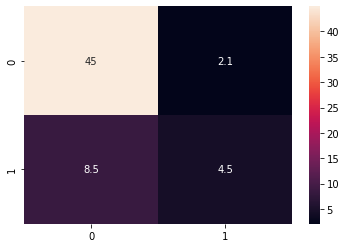

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_Class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_Class.fit(X_train,y_train)

preds = xg_Class.predict(X_test)

[[4486  217]
 [ 849  448]]


Accuracy0.8223333333333334


              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5335
           1       0.35      0.67      0.46       665

    accuracy                           0.82      6000
   macro avg       0.65      0.76      0.68      6000
weighted avg       0.89      0.82      0.85      6000





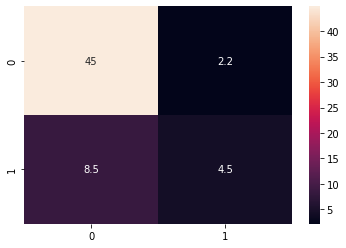

In [ ]:
cm = confusion_matrix(y_test, preds)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, preds)))
print("\n")
print(classification_report(preds, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# SVC

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[4703    0]
 [1297    0]]


Accuracy0.7838333333333334


              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


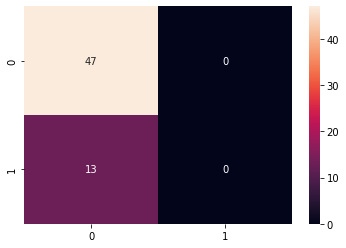

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2');
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

[[4645   58]
 [1104  193]]


Accuracy0.8063333333333333


              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5749
           1       0.15      0.77      0.25       251

    accuracy                           0.81      6000
   macro avg       0.57      0.79      0.57      6000
weighted avg       0.95      0.81      0.86      6000





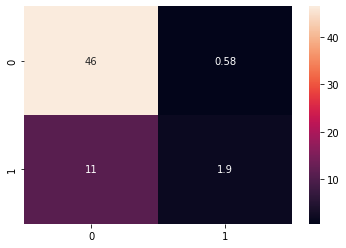

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# For Regression

# Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.12703275765645583
mean_sqrd_error is= 0.1479143813372769
root_mean_squared error of is== 0.3845963875769986


# VotingRegressor

In [ ]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
y_prediction = er.fit(X_train, y_train).predict(X_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.06336519382779304
mean_sqrd_error is= 0.15870212669377698
root_mean_squared error of is== 0.39837435496499646


# ***PCA***

In [ ]:
X=Dataset2Classification.drop(['ID','default payment next month'],axis=1)
y=Dataset2Classification['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
PCA_ = PCA(n_components=15, svd_solver='full')
X_train = PCA_.fit_transform(X_train,y_train)
X_test = PCA_.transform(X_test)

# For Classification

# RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[4703    0]
 [1297    0]]


Accuracy0.7838333333333334


              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


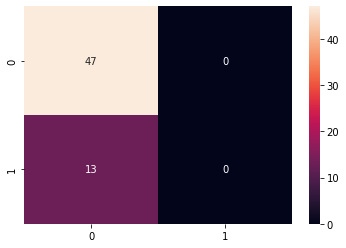

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_Class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_Class.fit(X_train,y_train)

preds = xg_Class.predict(X_test)

[[4625   78]
 [1073  224]]


Accuracy0.8081666666666667


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5698
           1       0.17      0.74      0.28       302

    accuracy                           0.81      6000
   macro avg       0.58      0.78      0.58      6000
weighted avg       0.94      0.81      0.86      6000





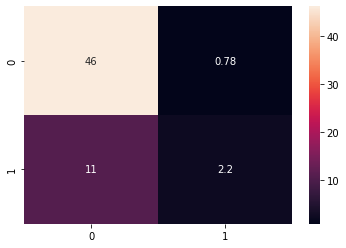

In [ ]:
cm = confusion_matrix(y_test, preds)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, preds)))
print("\n")
print(classification_report(preds, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# SVC

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[4599  104]
 [ 995  302]]


Accuracy0.8168333333333333


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5594
           1       0.23      0.74      0.35       406

    accuracy                           0.82      6000
   macro avg       0.61      0.78      0.62      6000
weighted avg       0.93      0.82      0.86      6000





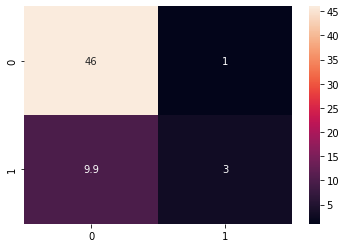

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2');
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

[[4629   74]
 [1074  223]]


Accuracy0.8086666666666666


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5703
           1       0.17      0.75      0.28       297

    accuracy                           0.81      6000
   macro avg       0.58      0.78      0.58      6000
weighted avg       0.94      0.81      0.86      6000





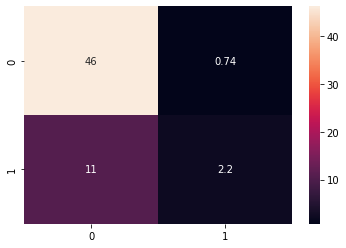

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# For Regression

# Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.12670729056308816
mean_sqrd_error is= 0.14796952803858024
root_mean_squared error of is== 0.38466807514866663


# VotingRegressor

In [ ]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
y_prediction = er.fit(X_train, y_train).predict(X_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.1674893315867586
mean_sqrd_error is= 0.1410594745164187
root_mean_squared error of is== 0.3755788525947896


# ***TSNE***

In [ ]:
X=Dataset2Classification.drop(['ID','default payment next month'],axis=1)
y=Dataset2Classification['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
TSNE_ = TSNE (n_components=1, verbose=0, perplexity=40, n_iter=300)
X_train = TSNE_.fit_transform(X_train,y_train)
X_test = TSNE_.fit_transform(X_test)

# For Classification

# RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[3682 1021]
 [ 783  514]]


Accuracy0.6993333333333334


              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4465
           1       0.40      0.33      0.36      1535

    accuracy                           0.70      6000
   macro avg       0.59      0.58      0.58      6000
weighted avg       0.68      0.70      0.69      6000





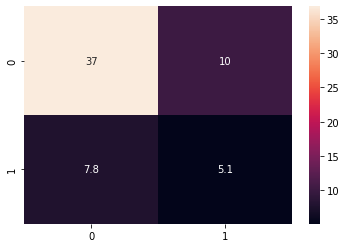

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_Class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_Class.fit(X_train,y_train)

preds = xg_Class.predict(X_test)

[[3692 1011]
 [ 786  511]]


Accuracy0.7005


              precision    recall  f1-score   support

           0       0.79      0.82      0.80      4478
           1       0.39      0.34      0.36      1522

    accuracy                           0.70      6000
   macro avg       0.59      0.58      0.58      6000
weighted avg       0.69      0.70      0.69      6000





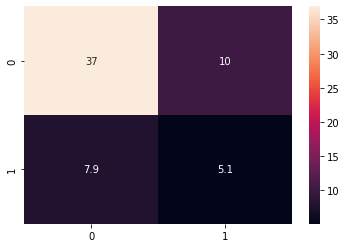

In [ ]:
cm = confusion_matrix(y_test, preds)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, preds)))
print("\n")
print(classification_report(preds, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# SVC

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[4703    0]
 [1297    0]]


Accuracy0.7838333333333334


              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


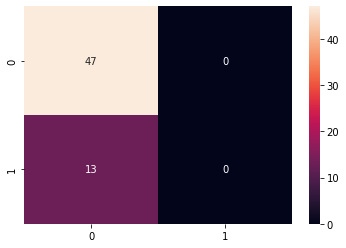

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2');
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

[[4542  161]
 [1042  255]]


Accuracy0.7995


              precision    recall  f1-score   support

           0       0.97      0.81      0.88      5584
           1       0.20      0.61      0.30       416

    accuracy                           0.80      6000
   macro avg       0.58      0.71      0.59      6000
weighted avg       0.91      0.80      0.84      6000





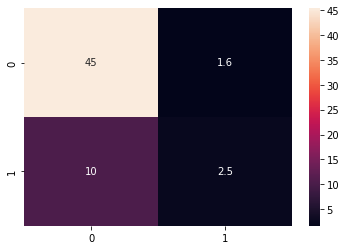

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# For Regression

# Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  -7.291801948916543e-06
mean_sqrd_error is= 0.16943987440188613
root_mean_squared error of is== 0.4116307500684152


# VotingRegressor

In [ ]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
y_prediction = er.fit(X_train, y_train).predict(X_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  -0.19898984493440097
mean_sqrd_error is= 0.20315520736728482
root_mean_squared error of is== 0.4507274202522904


# ***Feature Selection Using Regularisation***

In [ ]:
X=Dataset2Classification.drop(['ID','default payment next month'],axis=1)
y=Dataset2Classification['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((24000, 23), (6000, 23))

In [ ]:
sel_ = SelectFromModel(LogisticRegression(C=15, penalty='l1',solver='liblinear'))
sel_.fit(sc.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=15, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False])

In [ ]:
X_train=pd.DataFrame(X_train)
selected_feat = X_train.columns[sel_.get_support()]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 23
selected features: 20
features with coefficients shrank to zero: 3


In [ ]:
np.sum(sel_.estimator_.coef_ == 0)

3

In [ ]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Int64Index([18, 19, 22], dtype='int64')

In [ ]:
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)


X_train = X_train_selected 
X_test = X_test_selected

X_train_selected.shape, X_test_selected.shape

((24000, 20), (6000, 20))

# For Classification

# RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[4610   93]
 [1066  231]]


Accuracy0.8068333333333333


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5676
           1       0.18      0.71      0.29       324

    accuracy                           0.81      6000
   macro avg       0.58      0.76      0.59      6000
weighted avg       0.94      0.81      0.86      6000





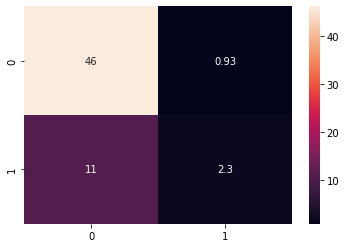

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_Class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_Class.fit(X_train,y_train)

preds = xg_Class.predict(X_test)

[[4586  117]
 [1024  273]]


Accuracy0.8098333333333333


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5610
           1       0.21      0.70      0.32       390

    accuracy                           0.81      6000
   macro avg       0.59      0.76      0.61      6000
weighted avg       0.93      0.81      0.85      6000





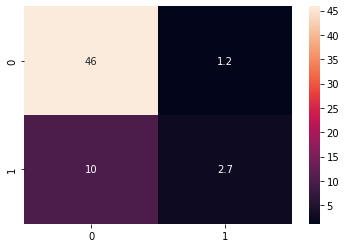

In [ ]:
cm = confusion_matrix(y_test, preds)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, preds)))
print("\n")
print(classification_report(preds, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# SVC

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[4594  109]
 [ 986  311]]


Accuracy0.8175


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5580
           1       0.24      0.74      0.36       420

    accuracy                           0.82      6000
   macro avg       0.61      0.78      0.63      6000
weighted avg       0.93      0.82      0.86      6000





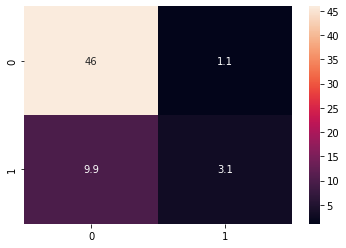

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2');
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

[[4631   72]
 [1069  228]]


Accuracy0.8098333333333333


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5700
           1       0.18      0.76      0.29       300

    accuracy                           0.81      6000
   macro avg       0.58      0.79      0.59      6000
weighted avg       0.94      0.81      0.86      6000





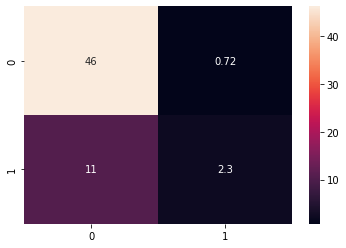

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# For Regression

# Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.1272196942486501
mean_sqrd_error is= 0.147882707055537
root_mean_squared error of is== 0.38455520677210575


# VotingRegressor

In [ ]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
y_prediction = er.fit(X_train, y_train).predict(X_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.18733617699594962
mean_sqrd_error is= 0.13769665204404719
root_mean_squared error of is== 0.37107499517489345


# ***Feature Selection Using Random forest***

In [ ]:
X=Dataset2Classification.drop(['ID','default payment next month'],axis=1)
y=Dataset2Classification['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((24000, 23), (6000, 23))

In [ ]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators = 100,max_features = 15))
sel_.fit(sc.transform(X_train), y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features=15,
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
   

In [ ]:
sel_.get_support()

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True])

In [ ]:
X_train=pd.DataFrame(X_train)
selected_feat = X_train.columns[sel_.get_support()]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.get_support())))

total features: 23
selected features: 10
features with coefficients shrank to zero: 10


In [ ]:
print(selected_feat)

Int64Index([0, 4, 5, 6, 17, 18, 19, 20, 21, 22], dtype='int64')


In [ ]:
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)


X_train = X_train_selected 
X_test = X_test_selected

X_train_selected.shape, X_test_selected.shape

((24000, 10), (6000, 10))

# For Classification

# RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[4598  105]
 [ 991  306]]


Accuracy0.8173333333333334


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5589
           1       0.24      0.74      0.36       411

    accuracy                           0.82      6000
   macro avg       0.61      0.78      0.63      6000
weighted avg       0.93      0.82      0.86      6000





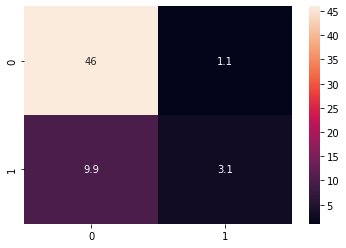

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_Class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_Class.fit(X_train,y_train)

preds = xg_Class.predict(X_test)

[[4653   50]
 [1137  160]]


Accuracy0.8021666666666667


              precision    recall  f1-score   support

           0       0.99      0.80      0.89      5790
           1       0.12      0.76      0.21       210

    accuracy                           0.80      6000
   macro avg       0.56      0.78      0.55      6000
weighted avg       0.96      0.80      0.86      6000





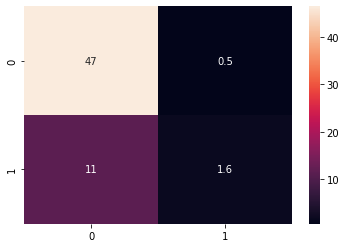

In [ ]:
cm = confusion_matrix(y_test, preds)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, preds)))
print("\n")
print(classification_report(preds, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# SVC

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[4594  109]
 [ 986  311]]


Accuracy0.8175


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5580
           1       0.24      0.74      0.36       420

    accuracy                           0.82      6000
   macro avg       0.61      0.78      0.63      6000
weighted avg       0.93      0.82      0.86      6000





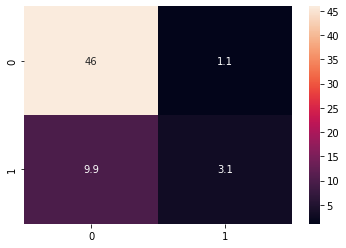

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2');
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

[[4642   61]
 [1101  196]]


Accuracy0.8063333333333333


              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5743
           1       0.15      0.76      0.25       257

    accuracy                           0.81      6000
   macro avg       0.57      0.79      0.57      6000
weighted avg       0.95      0.81      0.86      6000





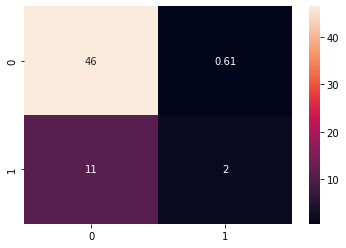

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# For Regression

# Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.12535120733302896
mean_sqrd_error is= 0.14819930093530154
root_mean_squared error of is== 0.3849666231445286


# VotingRegressor

In [ ]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
y_prediction = er.fit(X_train, y_train).predict(X_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.1690631797084312
mean_sqrd_error is= 0.14079280383286466
root_mean_squared error of is== 0.37522367173842414


# ***Feature Selection With XGBoost***

In [ ]:
X=Dataset2Classification.drop(['ID','default payment next month'],axis=1)
y=Dataset2Classification['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

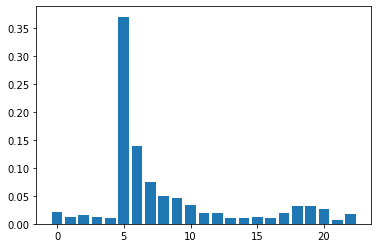

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 predictions = selection_model.predict(select_X_test)
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
 if select_X_train.shape[1] == 14:
	 break

Thresh=0.007, n=23, Accuracy: 82.98%
Thresh=0.010, n=22, Accuracy: 82.95%
Thresh=0.010, n=21, Accuracy: 83.07%
Thresh=0.010, n=20, Accuracy: 82.95%
Thresh=0.011, n=19, Accuracy: 82.88%
Thresh=0.011, n=18, Accuracy: 82.88%
Thresh=0.013, n=17, Accuracy: 83.00%
Thresh=0.013, n=16, Accuracy: 83.02%
Thresh=0.015, n=15, Accuracy: 82.98%
Thresh=0.017, n=14, Accuracy: 82.92%


# For Classification

# RandomForestClassifier

In [ ]:
X_train = select_X_train
X_test = select_X_test

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[4600  103]
 [1015  282]]


Accuracy0.8136666666666666


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5615
           1       0.22      0.73      0.34       385

    accuracy                           0.81      6000
   macro avg       0.60      0.78      0.61      6000
weighted avg       0.93      0.81      0.86      6000





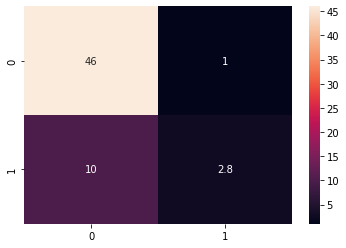

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_Class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_Class.fit(X_train,y_train)

preds = xg_Class.predict(X_test)

[[4542  161]
 [ 916  381]]


Accuracy0.8205


              precision    recall  f1-score   support

           0       0.97      0.83      0.89      5458
           1       0.29      0.70      0.41       542

    accuracy                           0.82      6000
   macro avg       0.63      0.77      0.65      6000
weighted avg       0.91      0.82      0.85      6000





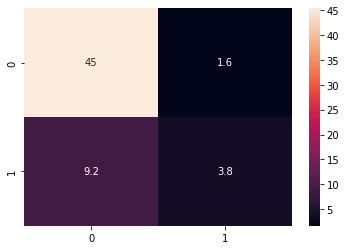

In [ ]:
cm = confusion_matrix(y_test, preds)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, preds)))
print("\n")
print(classification_report(preds, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# SVC

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[4594  109]
 [ 986  311]]


Accuracy0.8175


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5580
           1       0.24      0.74      0.36       420

    accuracy                           0.82      6000
   macro avg       0.61      0.78      0.63      6000
weighted avg       0.93      0.82      0.86      6000





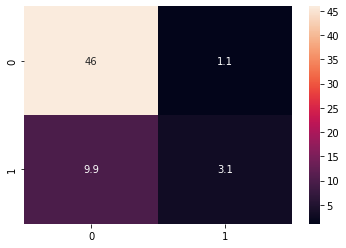

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2');
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

[[4631   72]
 [1064  233]]


Accuracy0.8106666666666666


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5695
           1       0.18      0.76      0.29       305

    accuracy                           0.81      6000
   macro avg       0.58      0.79      0.59      6000
weighted avg       0.94      0.81      0.86      6000





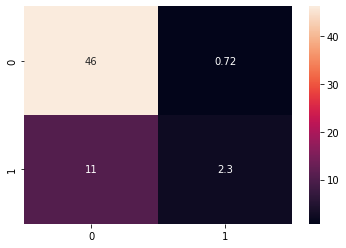

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# For Regression

# Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.1283024255616284
mean_sqrd_error is= 0.14769925053558355
root_mean_squared error of is== 0.38431660195154665


# VotingRegressor

In [ ]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
y_prediction = er.fit(X_train, y_train).predict(X_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.18704012515412693
mean_sqrd_error is= 0.13774681466516617
root_mean_squared error of is== 0.3711425799678153


# ***Recursive Feature Elimination***




In [ ]:
X=Dataset2Classification.drop(['ID','default payment next month'],axis=1)
y=Dataset2Classification['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
selector = selector.fit(X_train, y_train)
selector.support_


array([ True, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
np.sum(selector.support_)

15

In [ ]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


X_train = X_train_selected 
X_test = X_test_selected

X_train_selected.shape, X_test_selected.shape

((24000, 15), (6000, 15))

# For Classification

# RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[4695    8]
 [1260   37]]


Accuracy0.7886666666666666


              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5955
           1       0.03      0.82      0.06        45

    accuracy                           0.79      6000
   macro avg       0.51      0.81      0.47      6000
weighted avg       0.99      0.79      0.87      6000





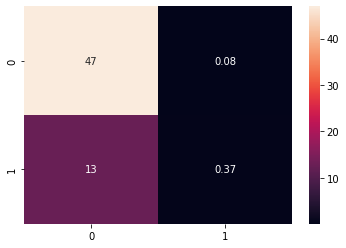

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_Class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_Class.fit(X_train,y_train)

preds = xg_Class.predict(X_test)

[[4691   12]
 [1238   59]]


Accuracy0.7916666666666666


              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5929
           1       0.05      0.83      0.09        71

    accuracy                           0.79      6000
   macro avg       0.52      0.81      0.48      6000
weighted avg       0.99      0.79      0.87      6000





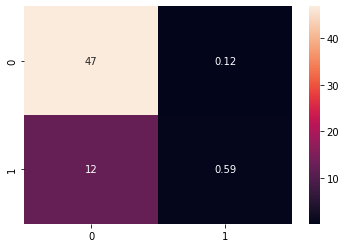

In [ ]:
cm = confusion_matrix(y_test, preds)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, preds)))
print("\n")
print(classification_report(preds, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# SVC

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[[4703    0]
 [1297    0]]


Accuracy0.7838333333333334


              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


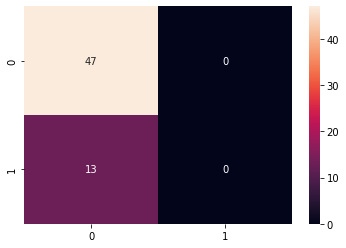

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2');
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)

[[4675   28]
 [1181  116]]


Accuracy0.7985


              precision    recall  f1-score   support

           0       0.99      0.80      0.89      5856
           1       0.09      0.81      0.16       144

    accuracy                           0.80      6000
   macro avg       0.54      0.80      0.52      6000
weighted avg       0.97      0.80      0.87      6000





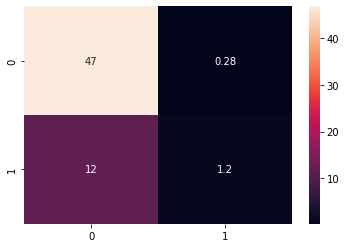

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print("\n")
print(classification_report(y_pred, y_test))
print("\n")
sns.heatmap(cm/100, annot=True)

# For Regression

# Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.1250073052237043
mean_sqrd_error is= 0.1482575712406165
root_mean_squared error of is== 0.38504229798895667


# VotingRegressor

In [ ]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
y_prediction = er.fit(X_train, y_train).predict(X_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.18278073066683143
mean_sqrd_error is= 0.13846852066958434
root_mean_squared error of is== 0.3721135857095039
